In [2]:
import pandas as pd

import numpy as np

file = './documents_of_type_presidential_document_and_of_presidential_document_type_executive_order.csv'

ex_dataset = pd.read_csv(file)

In [3]:
print(type(ex_dataset))
ex_dataset.head()

<class 'pandas.core.frame.DataFrame'>


,citation,document_number,end_page,html_url,pdf_url,type,subtype,publication_date,signing_date,start_page,title,disposition_notes,executive_order_number
0,83 FR 61505,2018-26156,61507,https://www.federalregister.gov/documents/2018...,https://www.gpo.gov/fdsys/pkg/FR-2018-11-29/pd...,Presidential Document,Executive Order,11/29/2018,11/27/2018,61505,Blocking Property of Certain Persons Contribut...,NaN,13851
1,83 FR 55243,2018-24254,55245,https://www.federalregister.gov/documents/2018...,https://www.gpo.gov/fdsys/pkg/FR-2018-11-02/pd...,Presidential Document,Executive Order,11/02/2018,11/01/2018,55243,Blocking Property of Additional Persons Contri...,NaN,13850
2,83 FR 48195,2018-20816,48200,https://www.federalregister.gov/documents/2018...,https://www.gpo.gov/fdsys/pkg/FR-2018-09-21/pd...,Presidential Document,Executive Order,09/21/2018,09/20/2018,48195,Authorizing the Implementation of Certain Sanc...,"See: EO 13694 of 4/1/2015, EO 13757 of 12/28/2...",13849
3,83 FR 46843,2018-20203,46848,https://www.federalregister.gov/documents/2018...,https://www.gpo.gov/fdsys/pkg/FR-2018-09-14/pd...,Presidential Document,Executive Order,09/14/2018,09/12/2018,46843,Imposing Certain Sanctions in the Event of For...,"See: 13694 of 4/1/2015, EO 13757 of 12/28/2016...",13848
4,83 FR 45321,2018-19514,45323,https://www.federalregister.gov/documents/2018...,https://www.gpo.gov/fdsys/pkg/FR-2018-09-06/pd...,Presidential Document,Executive Order,09/06/2018,08/31/2018,45321,Strengthening Retirement Security in America,NaN,13847


Before we try and extract the text from the URLs, I want to create another column called "President" and one called "Party" so that we have those pre-labeled before we make any transformations. I can see online that orders 13765-13851 were signed by Trump, 13490-13764 were signed by Obama, 13199-13487 were signed by Bush and 12890-13197 were signed by Clinton. This will help us assign each order to the president that gave it.

In [4]:
def president(x):
    if x > 13764:
        return "Trump"
    elif x > 13490:
        return "Obama"
    elif x > 13199:
        return "Bush"
    else:
        return "Clinton"

In [5]:
ex_dataset["President"] = ex_dataset["executive_order_number"].apply(president)

print(ex_dataset.head())

      citation document_number  end_page  \
0  83 FR 61505      2018-26156     61507   
1  83 FR 55243      2018-24254     55245   
2  83 FR 48195      2018-20816     48200   
3  83 FR 46843      2018-20203     46848   
4  83 FR 45321      2018-19514     45323   

                                            html_url  \
0  https://www.federalregister.gov/documents/2018...   
1  https://www.federalregister.gov/documents/2018...   
2  https://www.federalregister.gov/documents/2018...   
3  https://www.federalregister.gov/documents/2018...   
4  https://www.federalregister.gov/documents/2018...   

                                             pdf_url                   type  \
0  https://www.gpo.gov/fdsys/pkg/FR-2018-11-29/pd...  Presidential Document   
1  https://www.gpo.gov/fdsys/pkg/FR-2018-11-02/pd...  Presidential Document   
2  https://www.gpo.gov/fdsys/pkg/FR-2018-09-21/pd...  Presidential Document   
3  https://www.gpo.gov/fdsys/pkg/FR-2018-09-14/pd...  Presidential Document   
4  

Now we create the function that will add a col for the different political parties

In [6]:
def party(x):
    if x == "Trump":
        return "Republican"
    elif x == "Obama":
        return "Democrat"
    elif x == "Bush":
        return "Republican"
    else:
        return "Democrat"

In [73]:
ex_dataset["Party"] = ex_dataset["President"].apply(party)

print(ex_dataset.head())


       citation document_number  end_page  \
252  77 FR 6657       2012-3097      6662   

                                              html_url  \
252  https://www.federalregister.gov/documents/2012...   

                                               pdf_url                   type  \
252  https://www.gpo.gov/fdsys/pkg/FR-2012-02-08/pd...  Presidential Document   

             subtype publication_date signing_date  start_page  \
252  Executive Order       02/08/2012   02/05/2012        6657   

                                                 title  \
252  Blocking Property of the Government of Iran an...   

                                     disposition_notes  \
252  See: EO 12957, March 15, 1995; EO 12170, Novem...   

     executive_order_number President     Party In_HTML  
252                   13599     Obama  Democrat     Yes  


Now we're going to test how to get the text from one URL, and once we get that working we can nest the code in a for loop and apply it to the whole dataset

In [8]:
test_url = ex_dataset.iloc[0][3]
print(test_url)

https://www.federalregister.gov/documents/2018/11/29/2018-26156/blocking-property-of-certain-persons-contributing-to-the-situation-in-nicaragua


In [9]:
from urllib.request import Request, urlopen


In [47]:
import urllib
req = urllib.request.Request(test_url, headers={'User-Agent' : "Magic Browser"}) 
con = urllib.request.urlopen( req )
html = con.read()
# print(html)


In [48]:
from bs4 import BeautifulSoup

soup = BeautifulSoup(html)

soup_text = soup.get_text()

# print(soup_text)

/anaconda3/lib/python3.6/site-packages/bs4/__init__.py:181: UserWarning: No parser was explicitly specified, so I'm using the best available HTML parser for this system ("lxml"). This usually isn't a problem, but if you run this code on another system, or in a different virtual environment, it may use a different parser and behave differently.

The code that caused this warning is on line 193 of the file /anaconda3/lib/python3.6/runpy.py. To get rid of this warning, change code that looks like this:

 BeautifulSoup(YOUR_MARKUP})

to this:

 BeautifulSoup(YOUR_MARKUP, "lxml")

  markup_type=markup_type))


In [49]:
print(soup.title)

<title>
      Federal Register
       :: 
      Blocking Property of Certain Persons Contributing to the Situation in Nicaragua
    </title>


In [50]:
pretty_soup = soup.prettify()

# print(pretty_soup)

In [14]:
print(type(pretty_soup))

<class 'str'>


Now I looked through the documents to try and find a phrase that all the executive orders started with. I will use this to split the document so we only get the text of the order, not all the HTML information. I chose "Use the PDF linked in the document sidebar for the official electronic format". It's long, but I has issues with short phrases appearing earlier in the text. Below, I do the same with the end of the order and the phrase "[FR Doc."

In [51]:
doc1 = soup_text.split("Use the PDF linked in the document sidebar for the official electronic format",1)[1]
# print(doc1)



In [16]:
a,b = doc1.split("[FR Doc.")

print(a)


.





Start Printed Page 61505
Executive Order 13851 of November 27, 2018
        Blocking Property of Certain Persons Contributing to the Situation in Nicaragua
By the authority vested in me as President by the Constitution and the laws of the United States of America, including the International Emergency Economic Powers Act (50 U.S.C. 1701 et seq.) (IEEPA), the National Emergencies Act (50 U.S.C. 1601 et seq.) (NEA), section 212(f) of the Immigration and Nationality Act of 1952 (8 U.S.C. 1182(f)), and section 301 of title 3, United States Code,
I, DONALD J. TRUMP, President of the United States of America, find that the situation in Nicaragua, including the violent response by the Government of Nicaragua to the protests that began on April 18, 2018, and the Ortega regime's systematic dismantling and undermining of democratic institutions and the rule of law, its use of indiscriminate violence and repressive tactics against civilians, as well as its corruption leading to the destabi

In [17]:
ex_text = []

ex_text.append(a)

print(ex_text)


[".\n\n\n\n\n\nStart Printed Page 61505\nExecutive Order 13851 of November 27, 2018\n        Blocking Property of Certain Persons Contributing to the Situation in Nicaragua\nBy the authority vested in me as President by the Constitution and the laws of the United States of America, including the International Emergency Economic Powers Act (50 U.S.C. 1701 et seq.) (IEEPA), the National Emergencies Act (50 U.S.C. 1601 et seq.) (NEA), section 212(f) of the Immigration and Nationality Act of 1952 (8 U.S.C. 1182(f)), and section 301 of title 3, United States Code,\nI, DONALD J. TRUMP, President of the United States of America, find that the situation in Nicaragua, including the violent response by the Government of Nicaragua to the protests that began on April 18, 2018, and the Ortega regime's systematic dismantling and undermining of democratic institutions and the rule of law, its use of indiscriminate violence and repressive tactics against civilians, as well as its corruption leading to

In [18]:
orders_text = []

for entry in range(len(ex_dataset)):
    url = ex_dataset.iloc[entry][3]
    req = urllib.request.Request(url, headers={'User-Agent' : "Magic Browser"}) 
    con = urllib.request.urlopen( req )
    html = con.read()
    soup = BeautifulSoup(html)
    soup_text = soup.get_text()
    doc1 = soup_text.split("Use the PDF linked in the document sidebar for the official electronic format",1)[1]
    a,b = doc1.split("[FR Doc.")
    orders_text.append(a)
   

/anaconda3/lib/python3.6/site-packages/bs4/__init__.py:181: UserWarning: No parser was explicitly specified, so I'm using the best available HTML parser for this system ("lxml"). This usually isn't a problem, but if you run this code on another system, or in a different virtual environment, it may use a different parser and behave differently.

The code that caused this warning is on line 193 of the file /anaconda3/lib/python3.6/runpy.py. To get rid of this warning, change code that looks like this:

 BeautifulSoup(YOUR_MARKUP})

to this:

 BeautifulSoup(YOUR_MARKUP, "lxml")

  markup_type=markup_type))


ValueError: not enough values to unpack (expected 2, got 1)

Here we have an issue. I did some investigating and found out that not all the orders are avaliable in HTML format. The text of those documents just link to a flat file. I need to remove those documents. It will reduce the number of observances in our dataset, but there's no other way

In [19]:
exec_orders_len = len(ex_dataset)

print(exec_orders_len)

928


In [21]:
# I'm going to look at each text and create a boolean to see whether the text contains the phrase "[FR Doc."

test_cleaning = []

for entry in range(0, 928):
    url = ex_dataset.iloc[entry][3]
    req = urllib.request.Request(url, headers={'User-Agent' : "Magic Browser"}) 
    con = urllib.request.urlopen( req )
    html = con.read()
    soup = BeautifulSoup(html)
    soup_text = soup.get_text()
    test_cleaning.append(soup_text)
    



/anaconda3/lib/python3.6/site-packages/bs4/__init__.py:181: UserWarning: No parser was explicitly specified, so I'm using the best available HTML parser for this system ("lxml"). This usually isn't a problem, but if you run this code on another system, or in a different virtual environment, it may use a different parser and behave differently.

The code that caused this warning is on line 193 of the file /anaconda3/lib/python3.6/runpy.py. To get rid of this warning, change code that looks like this:

 BeautifulSoup(YOUR_MARKUP})

to this:

 BeautifulSoup(YOUR_MARKUP, "lxml")

  markup_type=markup_type))


In [22]:
substring = "[FR Doc."

check = []

for entry in test_cleaning:
    if substring in entry:
        value = "Yes"
        check.append(value)
    else:
        value = "No"
        check.append(value)

print(check)

['Yes', 'Yes', 'Yes', 'Yes', 'Yes', 'Yes', 'Yes', 'Yes', 'Yes', 'Yes', 'Yes', 'Yes', 'Yes', 'Yes', 'Yes', 'Yes', 'Yes', 'Yes', 'Yes', 'Yes', 'Yes', 'Yes', 'Yes', 'Yes', 'Yes', 'Yes', 'Yes', 'Yes', 'Yes', 'Yes', 'Yes', 'Yes', 'Yes', 'Yes', 'Yes', 'Yes', 'Yes', 'Yes', 'Yes', 'Yes', 'Yes', 'Yes', 'Yes', 'Yes', 'Yes', 'Yes', 'Yes', 'Yes', 'Yes', 'Yes', 'Yes', 'Yes', 'Yes', 'Yes', 'Yes', 'Yes', 'Yes', 'Yes', 'Yes', 'Yes', 'Yes', 'Yes', 'Yes', 'Yes', 'Yes', 'Yes', 'Yes', 'Yes', 'Yes', 'Yes', 'Yes', 'Yes', 'Yes', 'Yes', 'Yes', 'Yes', 'Yes', 'Yes', 'Yes', 'Yes', 'Yes', 'Yes', 'Yes', 'Yes', 'Yes', 'Yes', 'Yes', 'Yes', 'Yes', 'Yes', 'Yes', 'Yes', 'Yes', 'Yes', 'Yes', 'Yes', 'Yes', 'Yes', 'Yes', 'Yes', 'Yes', 'Yes', 'Yes', 'Yes', 'Yes', 'Yes', 'Yes', 'Yes', 'Yes', 'Yes', 'Yes', 'Yes', 'Yes', 'Yes', 'Yes', 'Yes', 'Yes', 'Yes', 'Yes', 'Yes', 'Yes', 'Yes', 'Yes', 'Yes', 'Yes', 'Yes', 'Yes', 'Yes', 'Yes', 'Yes', 'Yes', 'Yes', 'Yes', 'Yes', 'Yes', 'Yes', 'Yes', 'Yes', 'Yes', 'No', 'Yes', 'Yes', 'Yes',

In [25]:
ind = range(0, 928)
df = pd.DataFrame(index = ind, data = check, columns=["In_HTML"])

#print(df.head())

print((df[df["In_HTML"] == "No"]).head())

    In_HTML
139      No
303      No
707      No
708      No
709      No


Okay, now we know which orders aren't in HTML format, and we can remove those. There are 223

In [26]:
ex_dataset["In_HTML"] = df["In_HTML"]

print(ex_dataset.head())

      citation document_number  end_page  \
0  83 FR 61505      2018-26156     61507   
1  83 FR 55243      2018-24254     55245   
2  83 FR 48195      2018-20816     48200   
3  83 FR 46843      2018-20203     46848   
4  83 FR 45321      2018-19514     45323   

                                            html_url  \
0  https://www.federalregister.gov/documents/2018...   
1  https://www.federalregister.gov/documents/2018...   
2  https://www.federalregister.gov/documents/2018...   
3  https://www.federalregister.gov/documents/2018...   
4  https://www.federalregister.gov/documents/2018...   

                                             pdf_url                   type  \
0  https://www.gpo.gov/fdsys/pkg/FR-2018-11-29/pd...  Presidential Document   
1  https://www.gpo.gov/fdsys/pkg/FR-2018-11-02/pd...  Presidential Document   
2  https://www.gpo.gov/fdsys/pkg/FR-2018-09-21/pd...  Presidential Document   
3  https://www.gpo.gov/fdsys/pkg/FR-2018-09-14/pd...  Presidential Document   
4  

Okay, now we know which ones are in HTML. We can make a new dataset that contains only HTML orders, and work off that

In [27]:
cleaned_ex_data = ex_dataset[ex_dataset["In_HTML"] == "Yes"]

print(928-223)

# These number should be the same if the above code is successful
print(len(cleaned_ex_data))

705
705


Great! We now have 705 executive orders in HTML ready to be parsed into our dataframe.

In [28]:
exec_text = []

for entry in range(0, 705):
    url = cleaned_ex_data.iloc[entry][3]
    req = urllib.request.Request(url, headers={'User-Agent' : "Magic Browser"}) 
    con = urllib.request.urlopen( req )
    html = con.read()
    soup = BeautifulSoup(html)
    soup_text = soup.get_text()
    doc1 = soup_text.split("Use the PDF linked in the document sidebar for the official electronic format",1)[1]
    a,b = doc1.split("[FR Doc.")
    exec_text.append(a)

# I'm going to print a random order (100) to test that the for loop worked
print(exec_text[100])

/anaconda3/lib/python3.6/site-packages/bs4/__init__.py:181: UserWarning: No parser was explicitly specified, so I'm using the best available HTML parser for this system ("lxml"). This usually isn't a problem, but if you run this code on another system, or in a different virtual environment, it may use a different parser and behave differently.

The code that caused this warning is on line 193 of the file /anaconda3/lib/python3.6/runpy.py. To get rid of this warning, change code that looks like this:

 BeautifulSoup(YOUR_MARKUP})

to this:

 BeautifulSoup(YOUR_MARKUP, "lxml")

  markup_type=markup_type))


.





Executive Order 13751 of December 5, 2016
        Safeguarding the Nation From the Impacts of Invasive Species
By the authority vested in me as President by the Constitution and to ensure the faithful execution of the laws of the United States of America, including the National Environmental Policy Act of 1969, as amended (42 U.S.C. 4321 et seq.), the Nonindigenous Aquatic Nuisance Prevention and Control Act of 1990, (16 U.S.C. 4701 et seq.), the Plant Protection Act (7 U.S.C. 7701 et seq.), the Lacey Act, as amended (18 U.S.C. 42, 16 U.S.C. 3371-3378 et seq.), the Endangered Species Act of 1973, as amended (16 U.S.C. 1531 et seq.), the Noxious Weed Control and Eradication Act of 2004 (7 U.S.C. 7781 et seq.), and other pertinent statutes, to prevent the introduction of invasive species and provide for their control, and to minimize the economic, plant, animal, ecological, and human health impacts that invasive species cause, it is hereby ordered as follows:

Section 1.
Policy. I

Next we're going to append this list of strings to our dataset to get our final result

In [29]:
cleaned_ex_data["Order_Text"] = exec_text

print(cleaned_ex_data.head())

      citation document_number  end_page  \
0  83 FR 61505      2018-26156     61507   
1  83 FR 55243      2018-24254     55245   
2  83 FR 48195      2018-20816     48200   
3  83 FR 46843      2018-20203     46848   
4  83 FR 45321      2018-19514     45323   

                                            html_url  \
0  https://www.federalregister.gov/documents/2018...   
1  https://www.federalregister.gov/documents/2018...   
2  https://www.federalregister.gov/documents/2018...   
3  https://www.federalregister.gov/documents/2018...   
4  https://www.federalregister.gov/documents/2018...   

                                             pdf_url                   type  \
0  https://www.gpo.gov/fdsys/pkg/FR-2018-11-29/pd...  Presidential Document   
1  https://www.gpo.gov/fdsys/pkg/FR-2018-11-02/pd...  Presidential Document   
2  https://www.gpo.gov/fdsys/pkg/FR-2018-09-21/pd...  Presidential Document   
3  https://www.gpo.gov/fdsys/pkg/FR-2018-09-14/pd...  Presidential Document   
4  

/anaconda3/lib/python3.6/site-packages/ipykernel_launcher.py:1: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: http://pandas.pydata.org/pandas-docs/stable/indexing.html#indexing-view-versus-copy
  """Entry point for launching an IPython kernel.


Next, we're going to strip the new line \n from the text

In [30]:
for index, row in cleaned_ex_data.iterrows():
    cleaned_ex_data.loc[index, "Order_Text"] = cleaned_ex_data.loc[index, "Order_Text"].replace('\n', '')
    
print(cleaned_ex_data.head())

/anaconda3/lib/python3.6/site-packages/pandas/core/indexing.py:537: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: http://pandas.pydata.org/pandas-docs/stable/indexing.html#indexing-view-versus-copy
  self.obj[item] = s


      citation document_number  end_page  \
0  83 FR 61505      2018-26156     61507   
1  83 FR 55243      2018-24254     55245   
2  83 FR 48195      2018-20816     48200   
3  83 FR 46843      2018-20203     46848   
4  83 FR 45321      2018-19514     45323   

                                            html_url  \
0  https://www.federalregister.gov/documents/2018...   
1  https://www.federalregister.gov/documents/2018...   
2  https://www.federalregister.gov/documents/2018...   
3  https://www.federalregister.gov/documents/2018...   
4  https://www.federalregister.gov/documents/2018...   

                                             pdf_url                   type  \
0  https://www.gpo.gov/fdsys/pkg/FR-2018-11-29/pd...  Presidential Document   
1  https://www.gpo.gov/fdsys/pkg/FR-2018-11-02/pd...  Presidential Document   
2  https://www.gpo.gov/fdsys/pkg/FR-2018-09-21/pd...  Presidential Document   
3  https://www.gpo.gov/fdsys/pkg/FR-2018-09-14/pd...  Presidential Document   
4  

Now our data is clean and ready for analysis! Let's get some exploratory statistics, such as the number of orders per president

In [31]:
print("Trump:",len(cleaned_ex_data[cleaned_ex_data["President"] == "Trump"]))
print("Obama:",len(cleaned_ex_data[cleaned_ex_data["President"] == "Obama"]))
print("Bush:",len(cleaned_ex_data[cleaned_ex_data["President"] == "Bush"]))
print("Clinton:",len(cleaned_ex_data[cleaned_ex_data["President"] == "Clinton"]))

Trump: 87
Obama: 272
Bush: 291
Clinton: 55


We can see that Clinton has the least. This is likely because we discarded many of the executive orders that were't in HTML format, which are the older orders. Trump also doesn't have very many, likely becuase he hasn't been in office very long. Now let's compare Dems and Republicans:

In [32]:
print("Democrats:",len(cleaned_ex_data[cleaned_ex_data["Party"] == "Democrat"]))
print("Republicans:",len(cleaned_ex_data[cleaned_ex_data["Party"] == "Republican"]))

Democrats: 327
Republicans: 378


These numbers are pretty close, which will be good for comparisons. Next let's add a col that contains the length of the different orders

In [33]:
lengths = []

for index, row in cleaned_ex_data.iterrows():
    num = len(cleaned_ex_data.loc[index, "Order_Text"])
    lengths.append(num)

# this looks good, now we just add this to the main dataframe   
print(lengths)


[8555, 8380, 18662, 17754, 7619, 40410, 13682, 6590, 3183, 9886, 4951, 10791, 19216, 20876, 4339, 14347, 4406, 10517, 9140, 6978, 8067, 11066, 5842, 12365, 4425, 9871, 19286, 7072, 5255, 4072, 5830, 1391, 3446, 6716, 10321, 3125, 12175, 2383, 7336, 5698, 2481, 14858, 1822, 5328, 23761, 7243, 5246, 2151, 8480, 1810, 11608, 5143, 20955, 4385, 4866, 2259, 5988, 11592, 3646, 4029, 6464, 7491, 4491, 8262, 4839, 4773, 2310, 5343, 15384, 1612, 4117, 39293, 3558, 9821, 7478, 8412, 3973, 2313, 3920, 3016, 17300, 6183, 18503, 4309, 15469, 13304, 3416, 52635, 2256, 3135, 6839, 4486, 2175, 10694, 5187, 2853, 3462, 3122, 15429, 2633, 19986, 5944, 5498, 11498, 17768, 11605, 1256, 5154, 15280, 4202, 11578, 3769, 2488, 2503, 2917, 3007, 3180, 3035, 4711, 9653, 9230, 2245, 14021, 9266, 8405, 9759, 6317, 1688, 3044, 10947, 10642, 3577, 11129, 8529, 12239, 18918, 3312, 16001, 2278, 3054, 2771, 3676, 7007, 6490, 12889, 2165, 6031, 11698, 11851, 5907, 2434, 4039, 10951, 1021, 2706, 2303, 8763, 48997, 10990

In [34]:
cleaned_ex_data["Order_Length"] = lengths

print(cleaned_ex_data.head())

      citation document_number  end_page  \
0  83 FR 61505      2018-26156     61507   
1  83 FR 55243      2018-24254     55245   
2  83 FR 48195      2018-20816     48200   
3  83 FR 46843      2018-20203     46848   
4  83 FR 45321      2018-19514     45323   

                                            html_url  \
0  https://www.federalregister.gov/documents/2018...   
1  https://www.federalregister.gov/documents/2018...   
2  https://www.federalregister.gov/documents/2018...   
3  https://www.federalregister.gov/documents/2018...   
4  https://www.federalregister.gov/documents/2018...   

                                             pdf_url                   type  \
0  https://www.gpo.gov/fdsys/pkg/FR-2018-11-29/pd...  Presidential Document   
1  https://www.gpo.gov/fdsys/pkg/FR-2018-11-02/pd...  Presidential Document   
2  https://www.gpo.gov/fdsys/pkg/FR-2018-09-21/pd...  Presidential Document   
3  https://www.gpo.gov/fdsys/pkg/FR-2018-09-14/pd...  Presidential Document   
4  

/anaconda3/lib/python3.6/site-packages/ipykernel_launcher.py:1: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: http://pandas.pydata.org/pandas-docs/stable/indexing.html#indexing-view-versus-copy
  """Entry point for launching an IPython kernel.


Now let's compare the average length of each executive order across parties

In [35]:
import numpy as np

dems = cleaned_ex_data[cleaned_ex_data["Party"] == "Democrat"]
reps = cleaned_ex_data[cleaned_ex_data["Party"] == "Republican"]

print("Democrats:", np.mean(dems["Order_Length"]))
print("Republicans:", np.mean(reps["Order_Length"]))


Democrats: 7998.868501529052
Republicans: 6545.5661375661375


Now let's compare these two groups with some boxplots

In [36]:
import seaborn as sns

import matplotlib.pyplot as plt

len_box_adj = sns.boxplot(x="Order_Length", y = "Party", data = cleaned_ex_data, palette = "Set2", notch = True)

# I'm adjusting the x axis here to make the plot easier to see
plt.xlim(0, 21000)

(0, 21000)

We can see (by the notches) that executive orders written by democrats are statistically significantly longer than those written by republicans. Let's look at individual presidents as well

In [37]:

obama = cleaned_ex_data[cleaned_ex_data["President"] == "Obama"]
trump = cleaned_ex_data[cleaned_ex_data["President"] == "Trump"]
bush = cleaned_ex_data[cleaned_ex_data["President"] == "Bush"]
clinton = cleaned_ex_data[cleaned_ex_data["President"] == "Clinton"]

print("Obama:", np.mean(obama["Order_Length"]))
print("Trump:", np.mean(trump["Order_Length"]))
print("Bush:", np.mean(bush["Order_Length"]))
print("Clinton:", np.mean(clinton["Order_Length"]))


Obama: 8187.783088235294
Trump: 8724.471264367816
Bush: 5894.140893470791
Clinton: 7064.6


It appears that Bush's are by far the shortest, and surprisingly Trump's are the longest. Let's create another boxplot

(0, 21000)

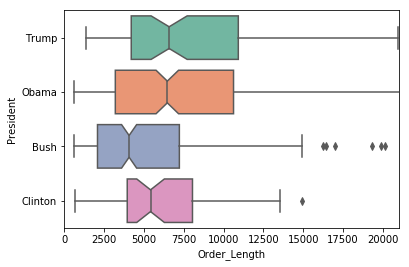

In [38]:
len_box_adj = sns.boxplot(x="Order_Length", y = "President", data = cleaned_ex_data, palette = "Set2", notch = True)

# I'm adjusting the x axis here to make the plot easier to see
plt.xlim(0, 21000)

It appears that the only president with significantly shorter executive orders is Bush. This likely explains why orders by Republicans appear to be much shorter. Next let's see how the length of all orders changed over time

In [39]:
# we need to change the date to a datetime object
cleaned_ex_data["publication_date"] = pd.to_datetime(cleaned_ex_data["publication_date"])


/anaconda3/lib/python3.6/site-packages/ipykernel_launcher.py:2: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: http://pandas.pydata.org/pandas-docs/stable/indexing.html#indexing-view-versus-copy
  


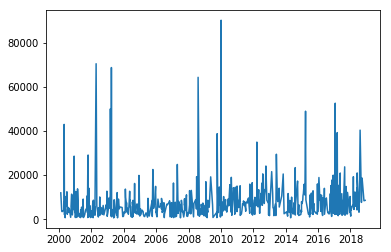

In [40]:
plt.plot(cleaned_ex_data["publication_date"], cleaned_ex_data["Order_Length"])

We can see several spikes here, probably from unusually long orders, but there doesn't appear to be any kind of trend persisting over time. We can also only look at the data below 21000, which is where we limited the boxplots

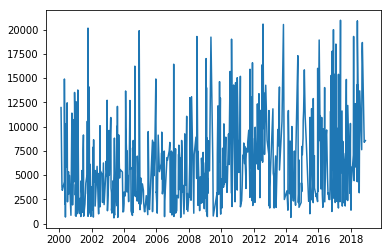

In [41]:
smaller_data = cleaned_ex_data[cleaned_ex_data["Order_Length"] < 21000]

plt.plot(smaller_data["publication_date"], smaller_data["Order_Length"])

Here we can see a possible positive trend, so let's do a linear regression to see if it's a positive trend and calculate pearson's r to see if it's significant

In [42]:
import datetime as dt

date_graph_data = cleaned_ex_data

date_graph_data["publication_date"]=date_graph_data["publication_date"].map(dt.datetime.toordinal)

/anaconda3/lib/python3.6/site-packages/ipykernel_launcher.py:5: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: http://pandas.pydata.org/pandas-docs/stable/indexing.html#indexing-view-versus-copy
  """


In [43]:
import statsmodels.api as sm

X = date_graph_data["publication_date"]
y = date_graph_data["Order_Length"]

model = sm.OLS(y, X).fit()
predictions = model.predict(X) # make the predictions by the model

# Print out the statistics
model.summary()


/anaconda3/lib/python3.6/site-packages/statsmodels/compat/pandas.py:56: FutureWarning: The pandas.core.datetools module is deprecated and will be removed in a future version. Please use the pandas.tseries module instead.
  from pandas.core import datetools


<class 'statsmodels.iolib.summary.Summary'>
"""
                            OLS Regression Results                            
==============================================================================
Dep. Variable:           Order_Length   R-squared:                       0.447
Model:                            OLS   Adj. R-squared:                  0.446
Method:                 Least Squares   F-statistic:                     568.0
Date:                Wed, 19 Dec 2018   Prob (F-statistic):           1.66e-92
Time:                        23:47:10   Log-Likelihood:                -7339.9
No. Observations:                 705   AIC:                         1.468e+04
Df Residuals:                     704   BIC:                         1.469e+04
Df Model:                           1                                         
Covariance Type:            nonrobust                                         
====================================================================================
                       coef    std err          t      P>|t|      [0.025      0.975]
------------------------------------------------------------------------------------
publication_date     0.0098      0.000     23.833      0.000       0.009       0.011
==============================================================================
Omnibus:                      721.562   Durbin-Watson:                   1.969
Prob(Omnibus):                  0.000   Jarque-Bera (JB):            35092.988
Skew:                           4.744   Prob(JB):                         0.00
Kurtosis:                      36.236   Cond. No.                         1.00
==============================================================================

Warnings:
[1] Standard Errors assume that the covariance matrix of the errors is correctly specified.
"""

Okay, so we can see that while we have a medium sized R-sq of 0.447, the coefficient of publication date is just 0.0098, which is quite small. Let's try this with the less extreme data

In [44]:
date_graph_data2 = smaller_data

date_graph_data2["publication_date"]=date_graph_data2["publication_date"].map(dt.datetime.toordinal)

X2 = date_graph_data2["publication_date"]
y2 = date_graph_data2["Order_Length"]

model2 = sm.OLS(y2, X2).fit()
predictions2 = model2.predict(X2) # make the predictions by the model

# Print out the statistics
model2.summary()


/anaconda3/lib/python3.6/site-packages/ipykernel_launcher.py:3: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: http://pandas.pydata.org/pandas-docs/stable/indexing.html#indexing-view-versus-copy
  This is separate from the ipykernel package so we can avoid doing imports until


<class 'statsmodels.iolib.summary.Summary'>
"""
                            OLS Regression Results                            
==============================================================================
Dep. Variable:           Order_Length   R-squared:                       0.667
Model:                            OLS   Adj. R-squared:                  0.666
Method:                 Least Squares   F-statistic:                     1366.
Date:                Wed, 19 Dec 2018   Prob (F-statistic):          4.52e-165
Time:                        23:47:11   Log-Likelihood:                -6703.5
No. Observations:                 684   AIC:                         1.341e+04
Df Residuals:                     683   BIC:                         1.341e+04
Df Model:                           1                                         
Covariance Type:            nonrobust                                         
====================================================================================
                       coef    std err          t      P>|t|      [0.025      0.975]
------------------------------------------------------------------------------------
publication_date     0.0084      0.000     36.956      0.000       0.008       0.009
==============================================================================
Omnibus:                      109.254   Durbin-Watson:                   1.730
Prob(Omnibus):                  0.000   Jarque-Bera (JB):              161.503
Skew:                           1.107   Prob(JB):                     8.51e-36
Kurtosis:                       3.876   Cond. No.                         1.00
==============================================================================

Warnings:
[1] Standard Errors assume that the covariance matrix of the errors is correctly specified.
"""

We have a higher R-sq, but still quite a small coeff for publication date. It's safe to say that the mean lengths of the executive orders haven't gone up over the years (or at least not much)

In [45]:
# if the coefficient is calculated per day, this means that the average executive order length 
# goes up about 3 characters a year. Likely not a clinically significant difference, especially given our limited data
0.0084*365

3.066

We should do some textual cleaning before we try and create a model. Let's remove all the punctuation and numbers from the texts

In [87]:
from nltk.stem import WordNetLemmatizer

from nltk.tokenize import word_tokenize

#import nltk
#nltk.download('punkt')

for index, row in cleaned_ex_data.iterrows():
    cleaned_ex_data.loc[index, "Tokens"] = word_tokenize(cleaned_ex_data.loc[index, "Order_Text"])

#for order in range(len(cleaned_ex_data["Order_Text"])):
#    cleaned_ex_data["Tokens"] = word_tokenize(cleaned_ex_data[order])



/anaconda3/lib/python3.6/site-packages/pandas/core/indexing.py:357: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: http://pandas.pydata.org/pandas-docs/stable/indexing.html#indexing-view-versus-copy
  self.obj[key] = _infer_fill_value(value)


ValueError: Must have equal len keys and value when setting with an iterable

In [61]:
# Next we'll start building our first prediction model: Party. We'll use test train split to split the data so we can test
# our model later

from sklearn.model_selection import train_test_split

y = cleaned_ex_data["Party"]

X_train, X_test, y_train, y_test = train_test_split(cleaned_ex_data["Order_Text"], y, test_size = 0.33, random_state = 53)

Now that the data is split, we'll use a count vectorizer to transform the data and get some feature names

In [64]:
from sklearn.feature_extraction.text import TfidfVectorizer

tfidf_vectorizer = TfidfVectorizer(stop_words="english", max_df=0.7)

tfidf_train = tfidf_vectorizer.fit_transform(X_train)

tfidf_test = tfidf_vectorizer.transform(X_test)

print(tfidf_vectorizer.get_feature_names()[:10])

print(tfidf_train.A[:5])

['00', '000', '01', '02', '03', '04', '05', '06', '07', '08']
[[0.         0.         0.         ... 0.         0.         0.        ]
 [0.         0.         0.08983416 ... 0.         0.         0.        ]
 [0.         0.         0.0287537  ... 0.         0.         0.        ]
 [0.         0.         0.         ... 0.         0.         0.        ]
 [0.02742105 0.         0.         ... 0.         0.         0.        ]]


In [65]:
# now we inspect the vectorizer

tfidf_df = pd.DataFrame(tfidf_train.A, columns=tfidf_vectorizer.get_feature_names())

print(tfidf_df.head())

         00  000        01   02   03   04   05   06   07   08     ...      \
0  0.000000  0.0  0.000000  0.0  0.0  0.0  0.0  0.0  0.0  0.0     ...       
1  0.000000  0.0  0.089834  0.0  0.0  0.0  0.0  0.0  0.0  0.0     ...       
2  0.000000  0.0  0.028754  0.0  0.0  0.0  0.0  0.0  0.0  0.0     ...       
3  0.000000  0.0  0.000000  0.0  0.0  0.0  0.0  0.0  0.0  0.0     ...       
4  0.027421  0.0  0.000000  0.0  0.0  0.0  0.0  0.0  0.0  0.0     ...       

   yunque  zero  zimbabwe  zimbabweby  zimondi  zone  zonepursuant  zones  \
0     0.0   0.0       0.0         0.0      0.0   0.0           0.0    0.0   
1     0.0   0.0       0.0         0.0      0.0   0.0           0.0    0.0   
2     0.0   0.0       0.0         0.0      0.0   0.0           0.0    0.0   
3     0.0   0.0       0.0         0.0      0.0   0.0           0.0    0.0   
4     0.0   0.0       0.0         0.0      0.0   0.0           0.0    0.0   

   zoning  zvinavashe  
0     0.0         0.0  
1     0.0         0.0  
2 

In [71]:
# it's very large! Let's now fit the classifier and create a confusion matrix

from sklearn.naive_bayes import MultinomialNB

from sklearn.metrics import accuracy_score, confusion_matrix

nb_classifier = MultinomialNB()

# Fit the classifier
nb_classifier.fit(tfidf_train, y_train)

# Create the predicted tags
pred = nb_classifier.predict(tfidf_test)

# Calculate the accuracy score
score = accuracy_score(y_test, pred)
print(score)

# Calculate the confusion matrix (NOTE WHY ISN'T THIS WORKING)
cm = confusion_matrix(y_test, pred, labels=['Rep', 'Dem'])
print(cm)

0.7124463519313304


ValueError: At least one label specified must be in y_true

So we have an accuracy score of 0.71, which isn't bad to start! Next we'll test a few different alphas and see which works best

In [75]:
alphas = np.arange(0, 1, 0.1)

# Define train_and_predict()
def train_and_predict(alpha):
    # Instantiate the classifier: nb_classifier
    nb_classifier = MultinomialNB(alpha=alpha)
    # Fit to the training data
    nb_classifier.fit(tfidf_train, y_train)
    # Predict the labels: pred
    pred = nb_classifier.predict(tfidf_test)
    # Compute accuracy: score
    score = accuracy_score(y_test, pred)
    return score

# Iterate over the alphas and print the corresponding score
for alpha in alphas:
    print('Alpha: ', alpha)
    print('Score: ', train_and_predict(alpha))
    print()

Alpha:  0.0
Score:  0.6695278969957081

Alpha:  0.1
Score:  0.6952789699570815

Alpha:  0.2
Score:  0.6952789699570815

Alpha:  0.30000000000000004
Score:  0.703862660944206

Alpha:  0.4
Score:  0.7081545064377682

Alpha:  0.5
Score:  0.7081545064377682

Alpha:  0.6000000000000001
Score:  0.703862660944206

Alpha:  0.7000000000000001
Score:  0.7081545064377682

Alpha:  0.8
Score:  0.703862660944206

Alpha:  0.9
Score:  0.703862660944206



/anaconda3/lib/python3.6/site-packages/sklearn/naive_bayes.py:472: UserWarning: alpha too small will result in numeric errors, setting alpha = 1.0e-10
  'setting alpha = %.1e' % _ALPHA_MIN)


It looks like we have three choices that produce maximum scores: alpha = 0.4, 0.5, or 0.7

We'll use the smallest alpha to minimize bias, so alpha = 0.4 produces the best model

Next we'll look at the features with the most weight, determining their importance

In [80]:

class_labels = nb_classifier.classes_

feature_names = tfidf_vectorizer.get_feature_names()

feat_with_weights = sorted(zip(nb_classifier.coef_[0], feature_names))

print(class_labels[0], feat_with_weights[:20])

print(class_labels[1], feat_with_weights[:20])


['00', '000', '01', '02', '03', '04', '05', '06', '07', '08', '09', '10', '100', '1000', '10000start', '10001start', '10002start', '10003start', '10004start', '10005start', '10006start', '10007start', '10008start', '10009start', '1001', '10010start', '10011start', '10012start', '10013start', '10014start', '10015start', '10016start', '10017start', '10018start', '10019start', '10020start', '10021start', '10022start', '10023start', '10024start', '10025start', '10026start', '10027start', '10028start', '10029start', '1003', '10030start', '10031start', '10032start', '10033start', '10034start', '10035start', '10036start', '10037start', '10038start', '10039start', '1004', '10040start', '10041start', '10042start', '10043start', '10044start', '10045start', '10046start', '10047start', '10048start', '10049start', '1005', '10050start', '10051start', '10052start', '10053start', '10054start', '10055start', '10056start', '10057start', '10058start', '10059start', '1006', '10060start', '10061start', '10